In [5]:
import os 
from dotenv import load_dotenv
load_dotenv()

from langgraph.graph import StateGraph,START,END
from langchain_nvidia_ai_endpoints import ChatNVIDIA, NVIDIAEmbeddings
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from typing import Any, Dict, List,TypedDict ,Union

In [6]:
llm= ChatNVIDIA(
    model="meta/llama3-70b-instruct",
    api_key=os.getenv("NVIDIA_API_KEY"),
    max_tokens=1000,
    temperature=0.1,
)

In [7]:
embedder = NVIDIAEmbeddings(
    model="nvidia/nv-embedqa-e5-v5",
    model_type="passage",
    api_key=os.getenv("nvidia_api_key")
)

In [14]:
class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage, SystemMessage]]
    
def process(state:AgentState)->AgentState:
    """ this node will solve the request input """
    response=llm.invoke(state["messages"])
    state["messages"].append(AIMessage(content=response.content))
    print(f"\n AI: {response.content}\n")
    print(f"CURRENT STATE: {state['messages']}\n")
    return state



In [15]:
graph=StateGraph(AgentState)
graph.add_node("process",process)
graph.add_edge(START, "process")
graph.add_edge("process", END)
agent=graph.compile()

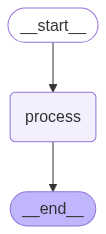

In [16]:
agent

In [ ]:
conversation_history=[]
user_input=input("enter the input :")
while user_input!="exit":
    conversation_history.append(HumanMessage(content=user_input))
    
    result=agent.invoke({"messages":conversation_history})
    
    print(result["messages"])
    
    conversation_history=result["messages"]
    user_input=input("enter the input :")
    
    

with open("conversation_history.txt", "w") as f:
    f.write("Conversation log:\n")
    for message in conversation_history:
        if isinstance(message, HumanMessage):
            f.write(f"User: {message.content}\n")
        elif isinstance(message, AIMessage):
            f.write(f"AI: {message.content}\n")
    f.write("\nEnd of conversation.\n")
print("Conversation history saved to conversation_history.txt")
        


 AI: Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?

CURRENT STATE: [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={})]

[HumanMessage(content='hello', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={})]

 AI: I'm doing well, thank you for asking! I'm a large language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist with any questions or tasks you may have. How about you? How's your day going so far?

CURRENT STATE: [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! It's nice to meet you. I

Conversation history saved to conversation_history.txt
